<h4>Importing all useful Libraries</h4>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h4>Importing DataSet</h4>

In [2]:
url = "http://bit.ly/w-data"

data = pd.read_csv(url)
print("Data Important Succesfully!! ")
data.head()

Data Important Succesfully!! 


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# Getting basic Information of Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
# Getting detailed Information about Dataset
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
#Selecting Independent and Dependent variable from Dataset
x = data.iloc[: , :1] # Independent Variable 
# x
y = data.iloc[: , 1:] # Dependent Variable
# y

In [6]:
# How much data is realated to respective column
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


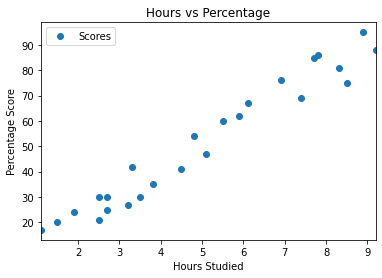

In [7]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

<h1>Linear Regression</h1>

In [24]:

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_regression = LinearRegression()
mse = cross_val_score(lin_regression , x , y , scoring = 'neg_mean_squared_error' , cv=5)
mean_mse = np.mean(mse)
print(mean_mse)

-38.4709444297968


<h1>Ridge Regression</h1>

In [9]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
parameters = {'alpha':[1e-15 , 1e-10 ,1e-8 ,1e-3 ,1e-2 ,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor = GridSearchCV(ridge  , parameters , scoring = 'neg_mean_squared_error' , cv=5)
ridge_regressor.fit(x,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [10]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1}
-38.430162795005444


<h1>Lasso Regression</h1>

In [11]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha':[1e-15 , 1e-10 ,1e-8 ,1e-3 ,1e-2 ,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor = GridSearchCV(lasso , parameters , scoring = 'neg_mean_squared_error' , cv=5)
lasso_regressor.fit(x,y)

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79.77992347067163, tolerance: 1.261855
  positive)
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 275.81019931838705, tolerance: 1.136255
  positive)
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 213.76798298435892, tolerance: 1.2718
  positive)
c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [12]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.01}
-38.469510091857686


In [13]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.3 ,random_state = 0 )

In [14]:
prediction_lasso = lasso_regressor.predict(x_test)
print(prediction_lasso)
prediction_ridge = ridge_regressor.predict(x_test)
print(prediction_ridge)

[17.15311606 33.76920453 74.82071721 26.92728575 60.15946268 39.63370634
 21.06278394 78.73038508]
[[17.37027938]
 [33.88124893]
 [74.67305605]
 [27.08261441]
 [60.10455351]
 [39.70864995]
 [21.25521339]
 [78.55799006]]


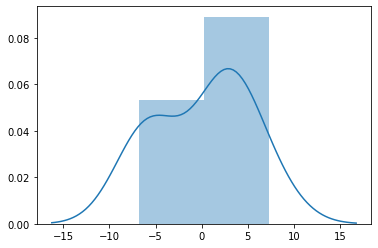

In [15]:
import seaborn as sns
lassopredictions=y_test-prediction_lasso.reshape(8,1)
sns.distplot(lassopredictions)

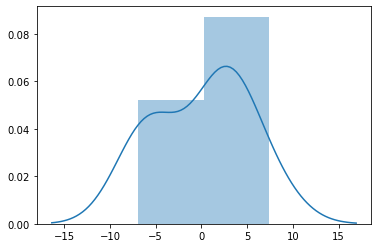

In [16]:
import seaborn as sns
sns.distplot(y_test-prediction_ridge)

From the above two distplot graph we came to know that Ridge and lasso almost same .

In [17]:
print(x_test) # Testing data - In Hours
y_pred = ridge_regressor.predict(x_test) # Predicting the scores

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9
22    3.8
17    1.9
24    7.8


In [18]:
df = pd.DataFrame({'Actual':[ y_test], 'Predicted': [y_pred]})  
df

,Actual,Predicted
0,Scores 5 20 2 27 19 69 16...,"[[17.37027938067759], [33.88124892875507], [74..."


<h4 >Here From above three modles i am selecting Ridge Regression because lasso use when there are more no of data and here we have limited data .</h4>

In [19]:
# You can also test with your own data
hours = 9.25
own_pred = ridge_regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = [92.64087585]


In [20]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.361538022053363


In [21]:
# print("----------------------Stats on Testing -----------------------------")
# print("r-sqaured score" , ridge_regressor.score(x_test , y_test))
# print("\n")
# print("----------------------Stats on Traning-----------------------------")
# print("r-sqaured score" , ridge_regressor.score(x_train , y_train))


In [22]:
# print("----------------------Stats on Testing -----------------------------")
# print("r-sqaured score" , lasso_regressor.score(x_test , y_test))
# print("\n")
# print("----------------------Stats on Traning-----------------------------")
# print("r-sqaured score" , lasso_regressor.score(x_train , y_train))
